In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_validate


In [2]:
df=pd.read_csv("product_review_data.csv")
df

,label,review
0,beauty,Sunscreen is non-greasy and protects well from...
1,home,Mixer grinder works efficiently and makes less...
2,clothing,The shirt fits perfectly and the material feel...
3,electronics,The keyboard feels premium and responsive.
4,beauty,The face cream feels light and absorbs quickly.
...,...,...
495,clothing,"Sweater quality is good, exactly as shown in p..."
496,electronics,The keyboard feels premium and responsive.
497,electronics,This laptop performance is amazing for the price.
498,home,Lamp gives a cozy light perfect for reading.


In [3]:
X=df["review"]
y=df["label"]
y

0           beauty
1             home
2         clothing
3      electronics
4           beauty
          ...     
495       clothing
496    electronics
497    electronics
498           home
499    electronics
Name: label, Length: 500, dtype: object

In [4]:
vector=CountVectorizer()
x_vector=vector.fit_transform(X)
x_vector

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3956 stored elements and shape (500, 205)>

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x_vector,y,test_size=0.2,random_state=42)

In [6]:
model=MultinomialNB()
model.fit(x_train,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [16]:
cross=cross_validate(model,x_vector,y,cv=5,return_train_score=True)
cross

{'fit_time': array([0.00344014, 0.00418401, 0.00272298, 0.00370955, 0.00279522]),
 'score_time': array([0.0018611 , 0.00093675, 0.00110483, 0.00148773, 0.00124335]),
 'test_score': array([1., 1., 1., 1., 1.]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [7]:
y_pred=model.predict(x_test)
y_pred

array(['home', 'electronics', 'beauty', 'home', 'clothing', 'electronics',
       'beauty', 'home', 'electronics', 'clothing', 'home', 'electronics',
       'beauty', 'electronics', 'beauty', 'electronics', 'clothing',
       'electronics', 'clothing', 'clothing', 'clothing', 'electronics',
       'beauty', 'beauty', 'beauty', 'clothing', 'electronics',
       'electronics', 'clothing', 'clothing', 'electronics',
       'electronics', 'electronics', 'beauty', 'clothing', 'electronics',
       'beauty', 'beauty', 'home', 'beauty', 'electronics', 'clothing',
       'beauty', 'home', 'home', 'electronics', 'beauty', 'electronics',
       'electronics', 'electronics', 'home', 'clothing', 'home',
       'electronics', 'home', 'electronics', 'beauty', 'clothing',
       'electronics', 'beauty', 'electronics', 'beauty', 'electronics',
       'beauty', 'beauty', 'electronics', 'electronics', 'home',
       'clothing', 'clothing', 'home', 'beauty', 'beauty', 'electronics',
       'clothing', 'c

In [13]:
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy:{accuracy*100:.2f}%")
classi=classification_report(y_test,y_pred)
print(classi)


accuracy:100.00%
              precision    recall  f1-score   support

      beauty       1.00      1.00      1.00        24
    clothing       1.00      1.00      1.00        26
 electronics       1.00      1.00      1.00        31
        home       1.00      1.00      1.00        19

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [9]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[24,  0,  0,  0],
       [ 0, 26,  0,  0],
       [ 0,  0, 31,  0],
       [ 0,  0,  0, 19]])

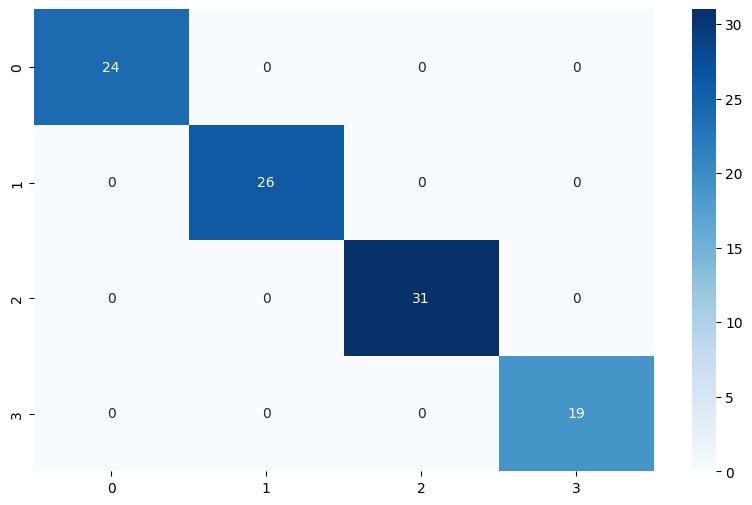

In [10]:
plt.figure(figsize=[10,6])
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
plt.show()

In [18]:
review=["The face cream feels light and absorbs quickly."]
vas=vector.transform(review)
pre=model.predict(vas)
pre

array(['beauty'], dtype='<U11')